In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
df1 = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
df1.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320


## Validation Set Impact

Text(0, 0.5, 'MSE')

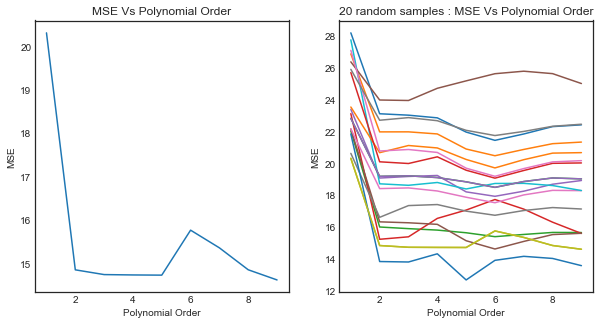

In [65]:
# Polynomial Order & Resampling Impact (random state)
poly_order = np.arange(1, 10, 1)
mse = []
plt.figure(figsize = (10, 5))
for i in np.arange(1, 20, 1):
    random_state = np.random.randint(100)
    mse = []
    for order in poly_order:
        poly = PolynomialFeatures(order)
        X = poly.fit_transform(df1['horsepower'].values.reshape(-1, 1))
        y = df1['mpg'].values
        xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = random_state, test_size = 0.2)
        model = skl_lm.LinearRegression()
        model.fit(xtrain, ytrain)
        pred = model.predict(xtest)
        mse.append(mean_squared_error(pred, ytest))
    plt.subplot(122)
    sns.lineplot(poly_order, mse)
    plt.title("20 random samples : MSE Vs Polynomial Order")
    plt.xlabel("Polynomial Order")
    plt.ylabel("MSE")

plt.subplot(121)
sns.lineplot(poly_order, mse)
plt.title("MSE Vs Polynomial Order")
plt.xlabel("Polynomial Order")
plt.ylabel("MSE")

1. The above plots shows the polynomial order importance on model. The polynomial order of 2 was sufficient in reducing the MSE compared with linear order in horsepower.       
2. The left plot was for a single random train-test sample.         
3. The right plot shows the extent of variation in the MSE with changing random splits in data. This also explains the standard errors and confidence intervals due to resampling from population. 

## Leave-One-Out CV

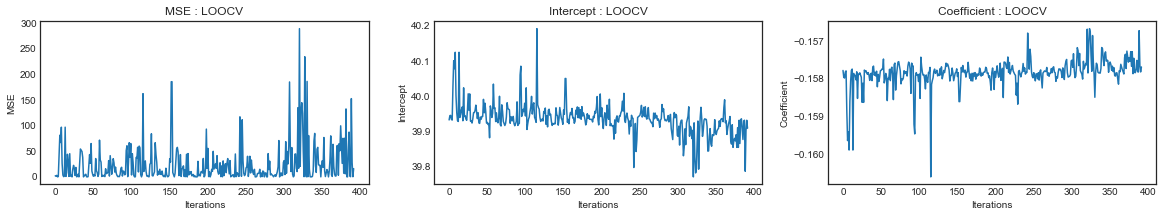

In [105]:
loo=LeaveOneOut()
mse, intercept, coeff = [], [], []
for train_index, test_index in loo.split(df1):
    xtrain = df1['horsepower'].values[train_index].reshape(-1, 1)
    ytrain = df1['mpg'].values[train_index].reshape(-1, 1)
    xtest = df1['horsepower'].values[test_index].reshape(-1, 1)
    ytest = df1['mpg'].values[test_index].reshape(-1, 1)
    model = skl_lm.LinearRegression()
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    mse.append(mean_squared_error(ytest, pred))
    intercept.append(model.intercept_[0])
    coeff.append(model.coef_[0][0])
plt.figure(figsize = (20, 3))
plt.subplot(131)
sns.lineplot(np.arange(0, df1.shape[0]), mse)
plt.title("MSE : LOOCV")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.subplot(132)
sns.lineplot(np.arange(0, df1.shape[0]), intercept)
plt.title("Intercept : LOOCV")
plt.xlabel("Iterations")
plt.ylabel("Intercept")
plt.subplot(133)
plt.title("Coefficient : LOOCV")
plt.xlabel("Iterations")
plt.ylabel("Coefficient")
sns.lineplot(np.arange(0, df1.shape[0]), coeff)

1. The LOOCV ideally has lowest variability in MSE, coeff, intercept.        
2. The points having higher mse could be outlier data! (my opinion :))

## K-fold Cross Validation

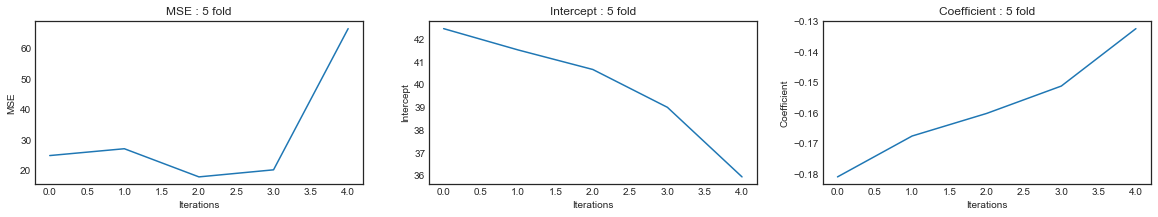

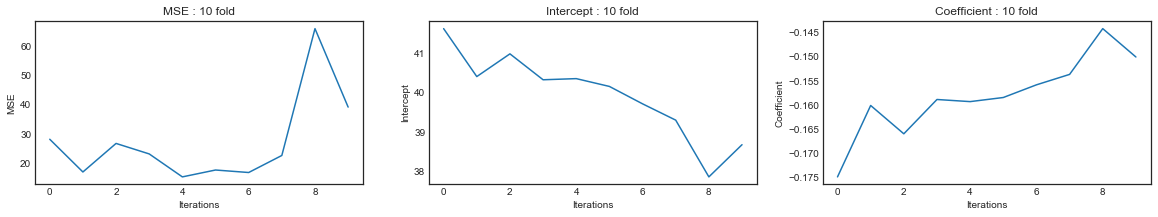

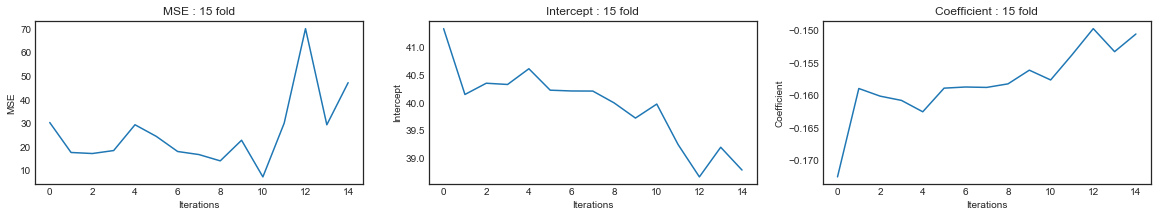

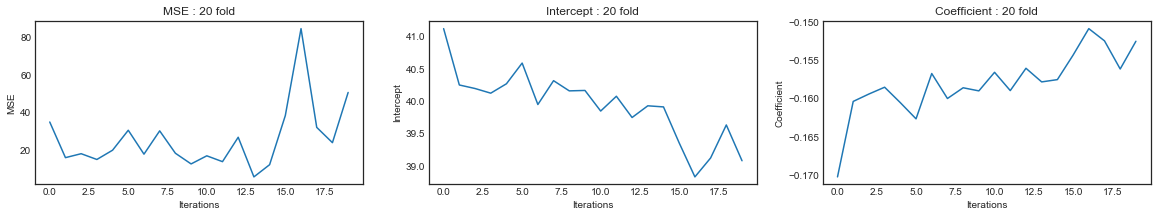

In [122]:
for fold in np.arange(5, 25, 5):
    kf = KFold(n_splits=fold, random_state=None, shuffle=False)
    mse, intercept, coeff = [], [], []
    for train_index, test_index in kf.split(df1):
        xtrain = df1['horsepower'].values[train_index].reshape(-1, 1)
        ytrain = df1['mpg'].values[train_index].reshape(-1, 1)
        xtest = df1['horsepower'].values[test_index].reshape(-1, 1)
        ytest = df1['mpg'].values[test_index].reshape(-1, 1)
        model = skl_lm.LinearRegression()
        model.fit(xtrain, ytrain)
        pred = model.predict(xtest)
        mse.append(mean_squared_error(ytest, pred))
        intercept.append(model.intercept_[0])
        coeff.append(model.coef_[0][0])
    plt.figure(figsize = (20, 3))
    plt.subplot(131)
    sns.lineplot(np.arange(0, fold), mse)
    plt.title(f"MSE : {fold} fold")
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.subplot(132)
    sns.lineplot(np.arange(0, fold), intercept)
    plt.title(f"Intercept : {fold} fold")
    plt.xlabel("Iterations")
    plt.ylabel("Intercept")
    plt.subplot(133)
    plt.title(f"Coefficient : {fold} fold")
    plt.xlabel("Iterations")
    plt.ylabel("Coefficient")
    sns.lineplot(np.arange(0, fold), coeff)
    plt.show()

## Estimating LOOCV & K-fold on polynomial order

Text(0.5, 1.0, '10 fold cv : MSE Vs Polynomial Order')

<Figure size 720x360 with 0 Axes>

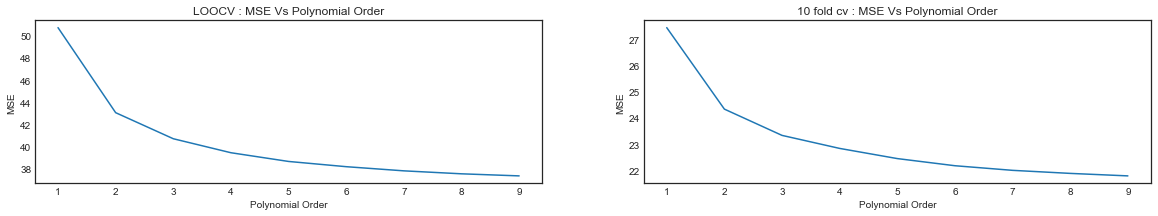

In [139]:
poly_order = np.arange(1, 10, 1)
mse_across_order_lcv, mse_in_order_lcv = [], []
mse_across_order_kcv, mse_in_order_kcv = [], []

plt.figure(figsize = (10, 5))
for order in poly_order:
    poly = PolynomialFeatures(order)
    X = poly.fit_transform(df1['horsepower'].values.reshape(-1, 1))
    y = df1['mpg'].values
    loo=LeaveOneOut()
    kf = KFold(n_splits=10)
    for train, test in loo.split(df1):
        xtrain = X[train_index]
        ytrain = y[train_index].reshape(-1, 1)
        xtest = X[test_index]
        ytest = y[test_index].reshape(-1, 1)
        model = skl_lm.LinearRegression()
        model.fit(xtrain, ytrain)
        pred = model.predict(xtest)
        mse_in_order_lcv.append(mean_squared_error(ytest, pred))
    mse_across_order_lcv.append(np.mean(mse_in_order_lcv))
       
    for train_index, test_index in kf.split(df1):
        xtrain = X[train_index]
        ytrain = y[train_index].reshape(-1, 1)
        xtest = X[test_index]
        ytest = y[test_index].reshape(-1, 1)
        model = skl_lm.LinearRegression()
        model.fit(xtrain, ytrain)
        pred = model.predict(xtest)
        mse_in_order_kcv.append(mean_squared_error(ytest, pred))
    mse_across_order_kcv.append(np.mean(mse_in_order_kcv))
plt.figure(figsize = (20, 3))
plt.subplot(121)
sns.lineplot(poly_order, mse_across_order_lcv)
plt.title("LOOCV : MSE Vs Polynomial Order")
plt.xlabel("Polynomial Order")
plt.ylabel("MSE")

plt.subplot(122)
sns.lineplot(poly_order, mse_across_order_kcv)
plt.xlabel("Polynomial Order")
plt.ylabel("MSE")
plt.title("10 fold cv : MSE Vs Polynomial Order")